In [81]:
import joblib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, DotProduct
import seaborn as sns
from scipy.stats import beta

In [4]:
def train_gp(state_vectors, td_lambda_targets, alpha):
    # train a Gaussian Process to predict the td_lambda_targets
    gp_value_fucntion = GaussianProcessRegressor(alpha=alpha, kernel=ConstantKernel() + RBF())
    gp_value_fucntion.fit(state_vectors, td_lambda_targets)
    return gp_value_fucntion

In [125]:
def plot_across_dimension(state, dimension, v_f, dimension_range, dimension_name):
    # plot the value function across a dimension
    state = np.tile(state, (100, 1))
    state[:, dimension] = np.linspace(dimension_range[0], dimension_range[1], 100)
    mean_prediction, std_prediction = v_f.predict(state, return_std=True)
    plt.plot(state[:, dimension], mean_prediction, label="Mean prediction")
    plt.fill_between(
        state[:, dimension].ravel(),
        mean_prediction - std_prediction,
        mean_prediction + std_prediction,
        color="tab:orange",
        alpha=0.5,
        label=r"1 standard deviation",
    )
    plt.legend()
    plt.xlabel(dimension_name)
    plt.ylabel("value")
    plt.title("Gaussian process cut across 1 dimension")
    # fix axis
    plt.xlim(dimension_range)
    plt.ylim([-1, 1])


In [122]:
# final vfs
v_f_linear = joblib.load('15_batches_5_games_10_data_each_linear_kernel_constant_depth_linear_regression_batch_2.joblib')
v_f_rbf = joblib.load('15_batches_5_games_10_data_each_fixed_kernel_constant_depth_batch_8.joblib')
v_f_residual = joblib.load('15_batches_5_games_10_data_each_linear_and_rbf_kernel_constant_depth_batch_6.joblib')

In [123]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 10}

matplotlib.rc('font', **font)

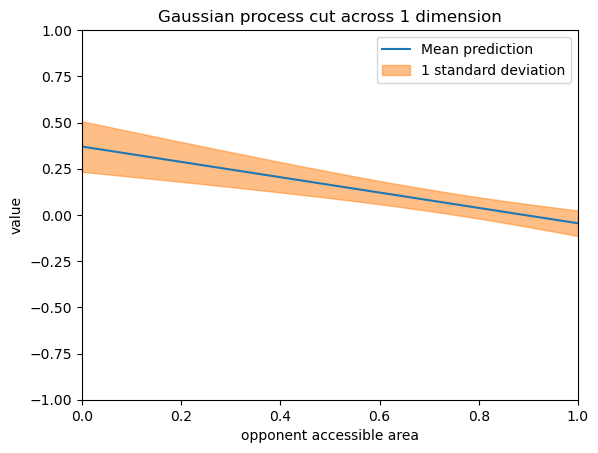

In [169]:
state = [0.2075471698113206, 0.562264150943394, 0.0, 0.5415094339622641, 82.0]
plot_across_dimension(state, 3, v_f_linear, (0, 1), 'opponent accessible area')

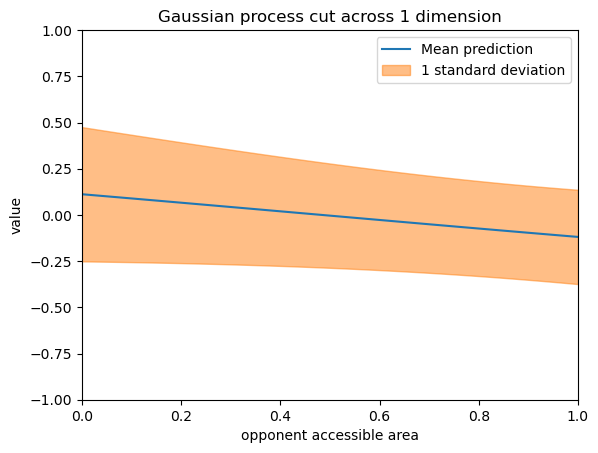

In [127]:
plot_across_dimension(state, 3, v_f_rbf, (0, 1), 'opponent accessible area')

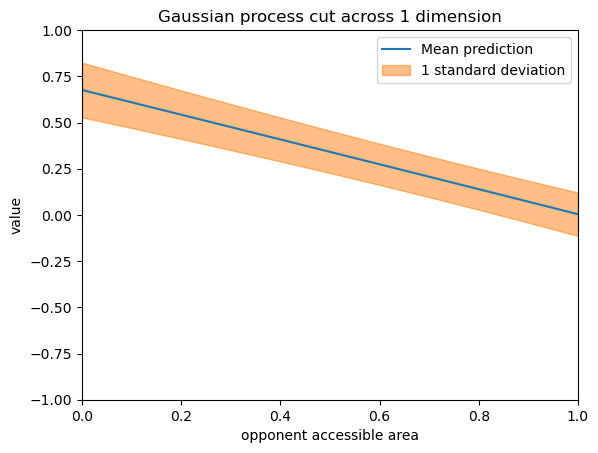

In [128]:
plot_across_dimension(state, 3, v_f_residual, (0, 1), 'opponent accessible area')

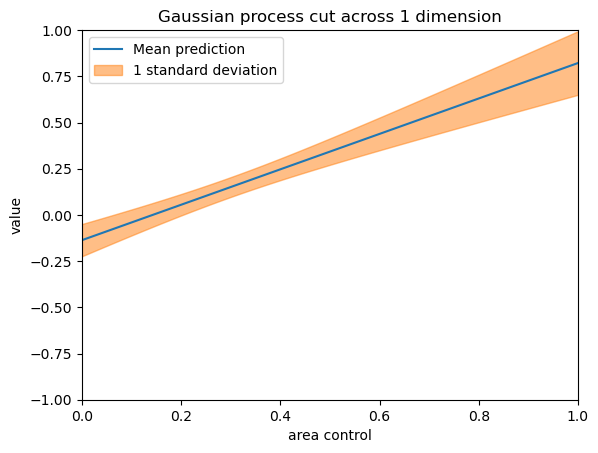

In [129]:
plot_across_dimension(state, 0, v_f_linear, (0, 1), 'area control')

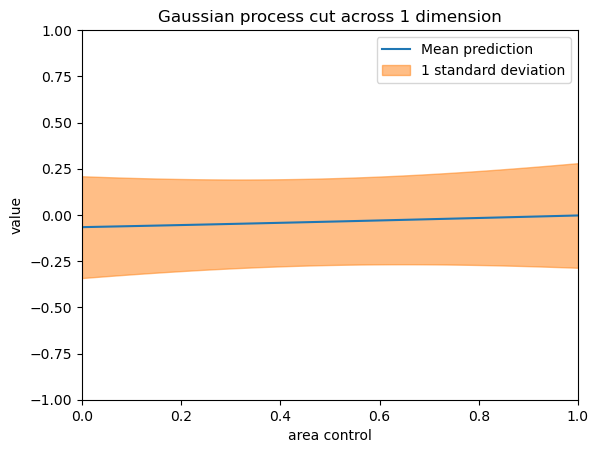

In [130]:
plot_across_dimension(state, 0, v_f_rbf, (0, 1), 'area control')

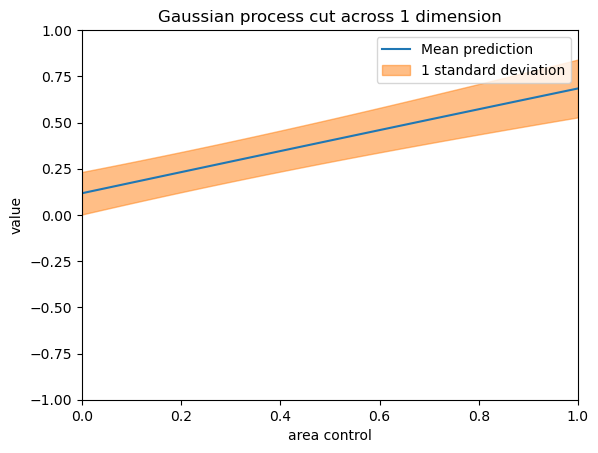

In [131]:
plot_across_dimension(state, 0, v_f_residual, (0, 1), 'area control')

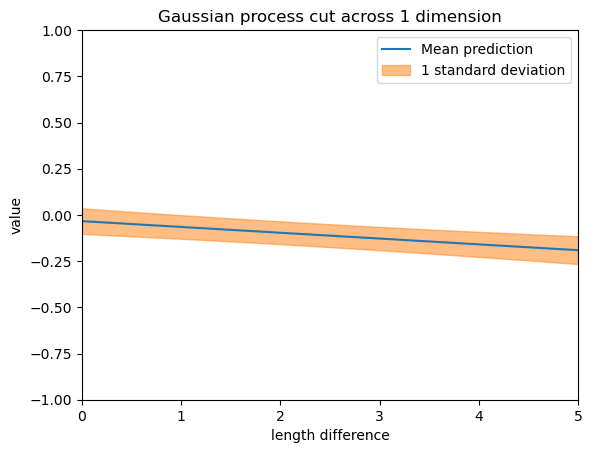

In [132]:
plot_across_dimension(state, 2, v_f_linear, (0, 5), 'length difference')

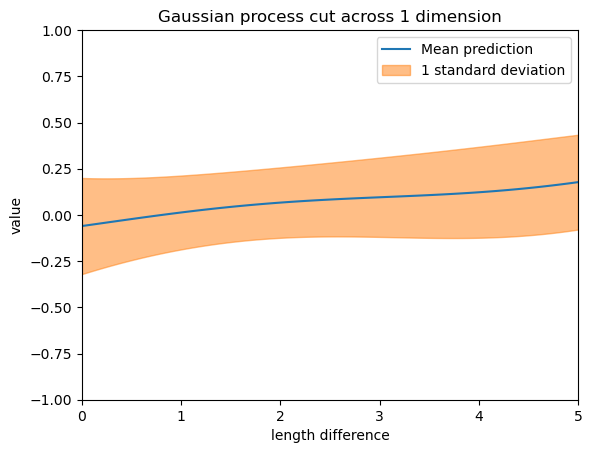

In [133]:
plot_across_dimension(state, 2, v_f_rbf, (0, 5), 'length difference')

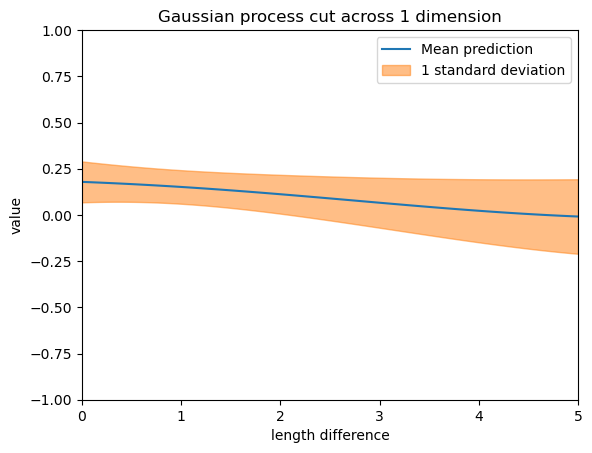

In [134]:
plot_across_dimension(state, 2, v_f_residual, (0, 5), 'length difference')

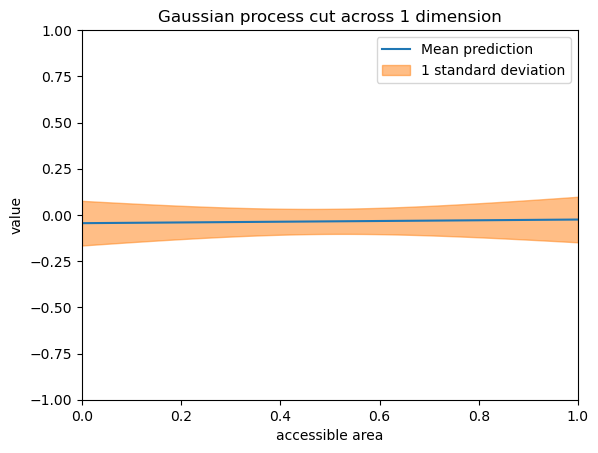

In [135]:
plot_across_dimension(state, 1, v_f_linear, (0, 1), 'accessible area')

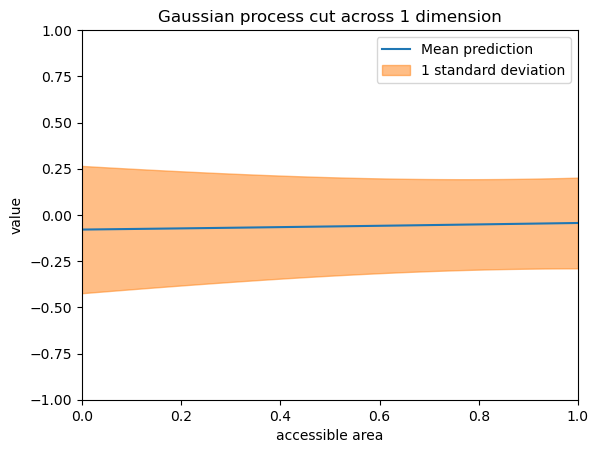

In [136]:
plot_across_dimension(state, 1, v_f_rbf, (0, 1), 'accessible area')

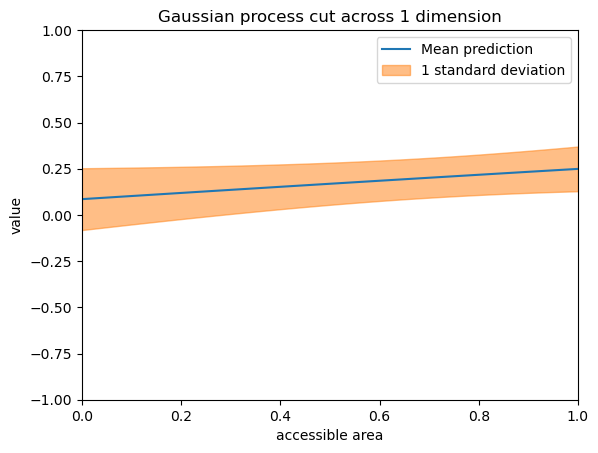

In [137]:
plot_across_dimension(state, 1, v_f_residual, (0, 1), 'accessible area')

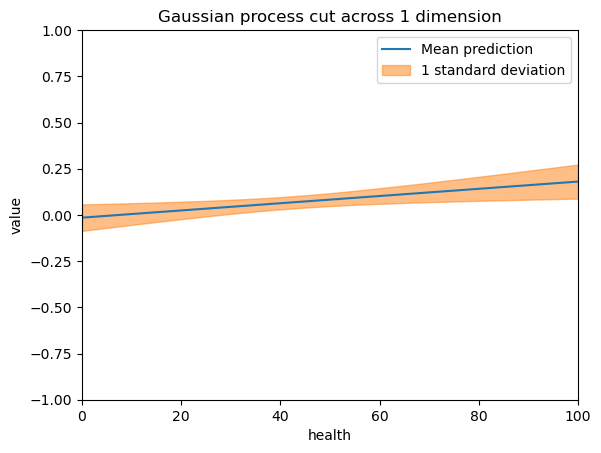

In [170]:
plot_across_dimension(state, 4, v_f_linear, (0, 100), 'health')

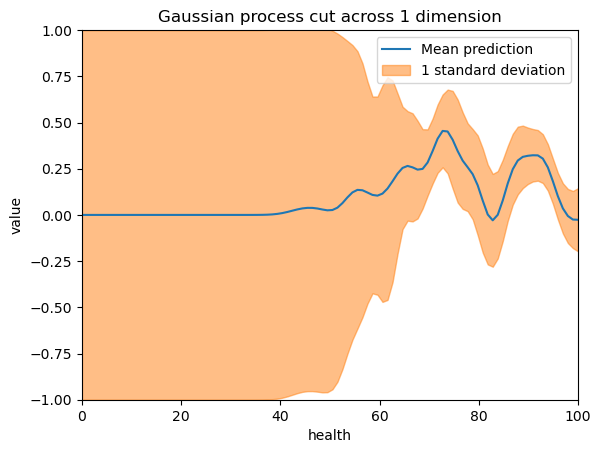

In [171]:
plot_across_dimension(state, 4, v_f_rbf, (0, 100), 'health')

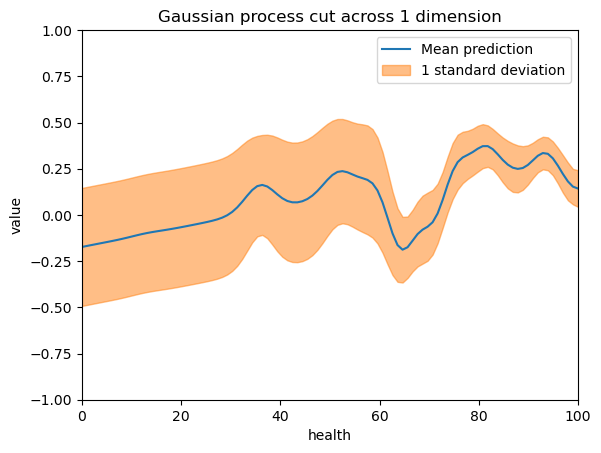

In [172]:
plot_across_dimension(state, 4, v_f_residual, (0, 100), 'health')

In [141]:
# plots for kernel smoothness
[0.1, 0.5, 1, 5, 10, 20, 50, 100]
v_f_rbf_01 = joblib.load('15_batches_5_games_10_data_each_fixed_kernel_constant_depth_batch_6_smoothness0.1.joblib')
v_f_rbf_05 = joblib.load('15_batches_5_games_10_data_each_fixed_kernel_constant_depth_batch_6_smoothness0.5.joblib')
v_f_rbf_1 = joblib.load('15_batches_5_games_10_data_each_fixed_kernel_constant_depth_batch_6_smoothness1.joblib')
v_f_rbf_5 = joblib.load('15_batches_5_games_10_data_each_fixed_kernel_constant_depth_batch_6_smoothness5.joblib')
v_f_rbf_10 = joblib.load('15_batches_5_games_10_data_each_fixed_kernel_constant_depth_batch_6_smoothness10.joblib')
v_f_rbf_20 = joblib.load('15_batches_5_games_10_data_each_fixed_kernel_constant_depth_batch_6_smoothness20.joblib')
v_f_rbf_50 = joblib.load('15_batches_5_games_10_data_each_fixed_kernel_constant_depth_batch_6_smoothness50.joblib')
v_f_rbf_100 = joblib.load('15_batches_5_games_10_data_each_fixed_kernel_constant_depth_batch_6_smoothness100.joblib')

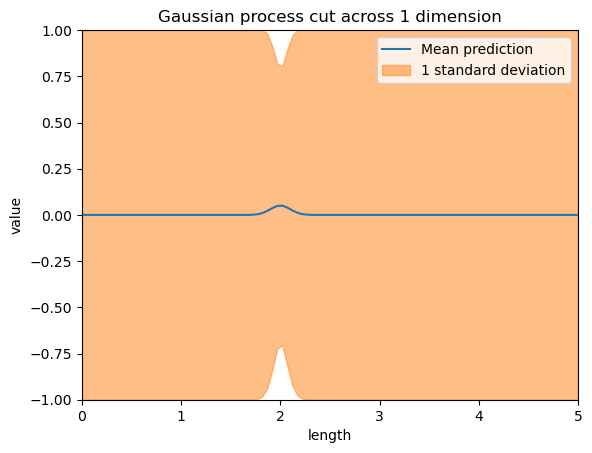

In [175]:
plot_across_dimension(state, 2, v_f_rbf_01, (0, 5), 'length')

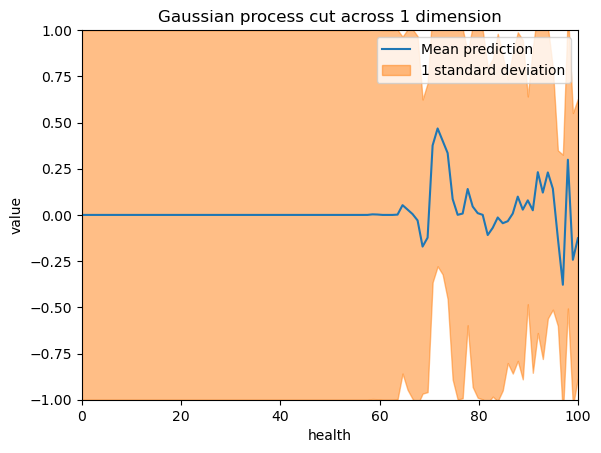

In [143]:
plot_across_dimension(state, 4, v_f_rbf_05, (0, 100), 'health')

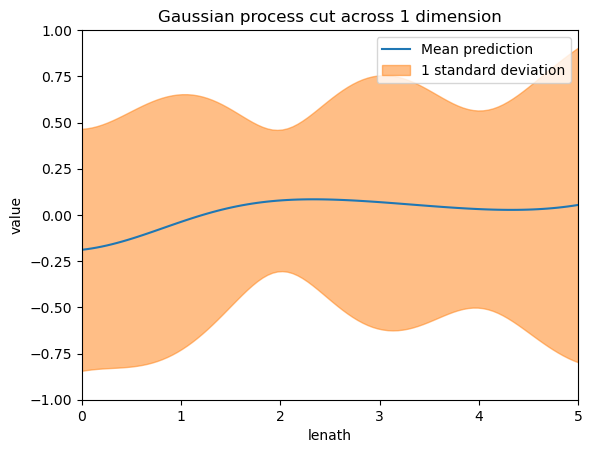

In [176]:
plot_across_dimension(state, 2, v_f_rbf_1, (0, 5), 'lenath')

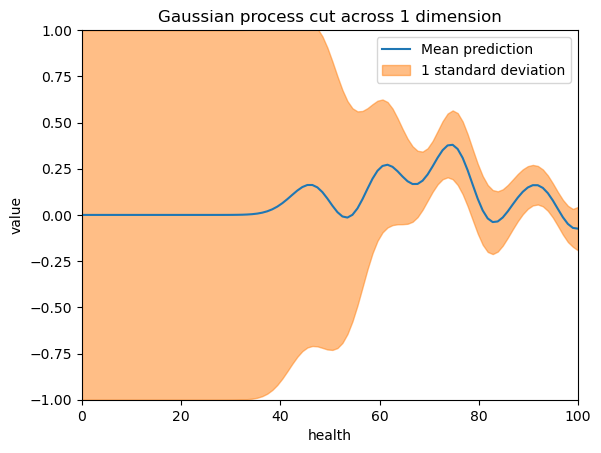

In [145]:
plot_across_dimension(state, 4, v_f_rbf_5, (0, 100), 'health')

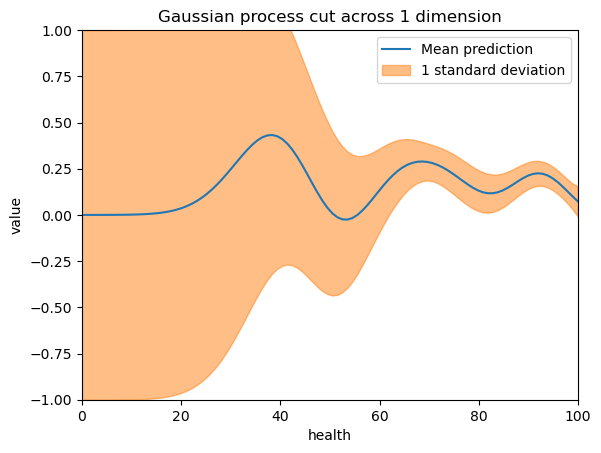

In [178]:
plot_across_dimension(state, 4, v_f_rbf_10, (0, 100), 'health')

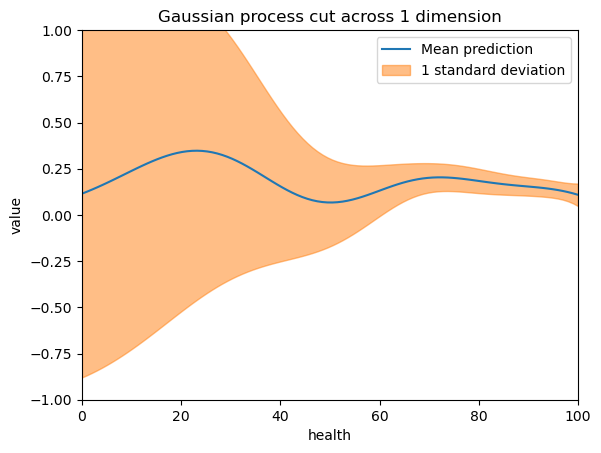

In [147]:
plot_across_dimension(state, 4, v_f_rbf_20, (0, 100), 'health')

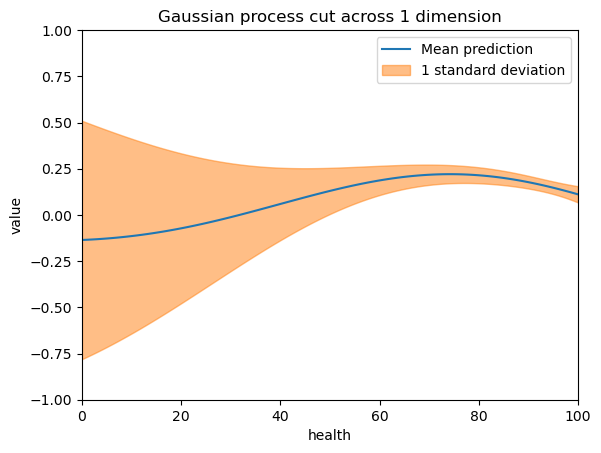

In [148]:
plot_across_dimension(state, 4, v_f_rbf_50, (0, 100), 'health')

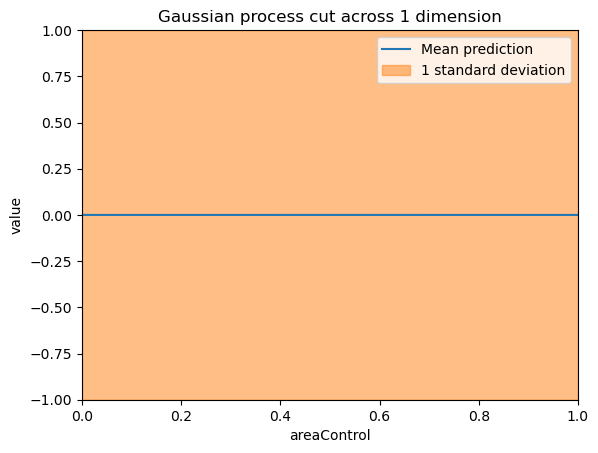

In [149]:
plot_across_dimension(state, 0, v_f_rbf_01, (0, 1), 'areaControl')

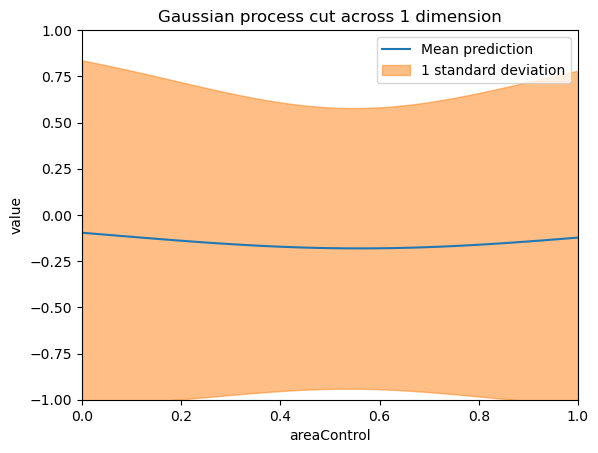

In [150]:
plot_across_dimension(state, 0, v_f_rbf_05, (0, 1), 'areaControl')

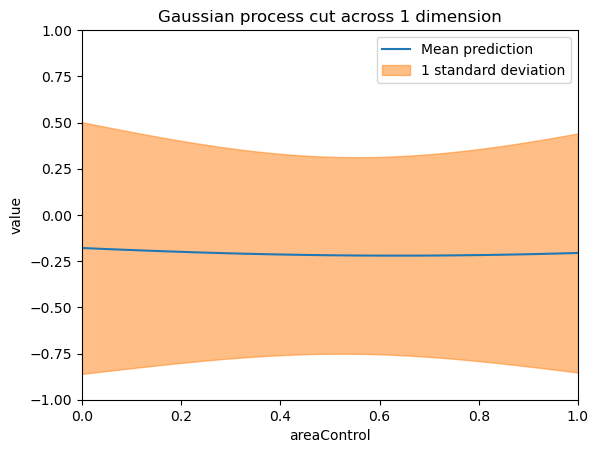

In [151]:
plot_across_dimension(state, 0, v_f_rbf_1, (0, 1), 'areaControl')

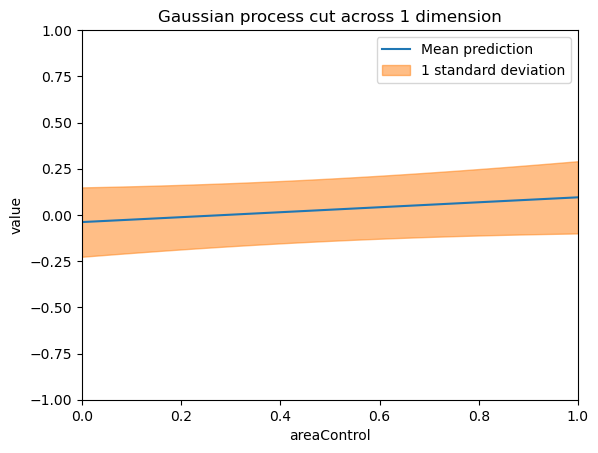

In [152]:
plot_across_dimension(state, 0, v_f_rbf_5, (0, 1), 'areaControl')

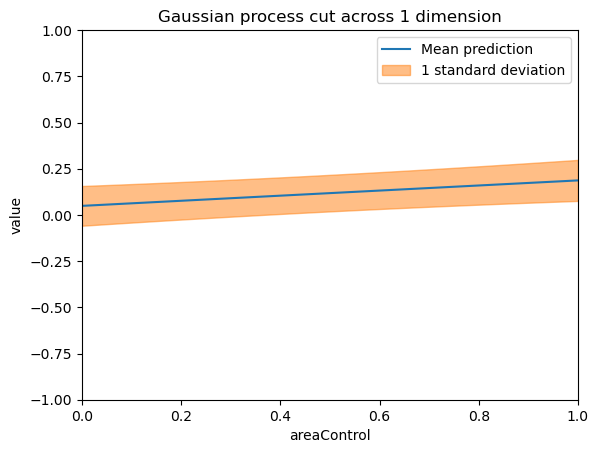

In [153]:
plot_across_dimension(state, 0, v_f_rbf_10, (0, 1), 'areaControl')

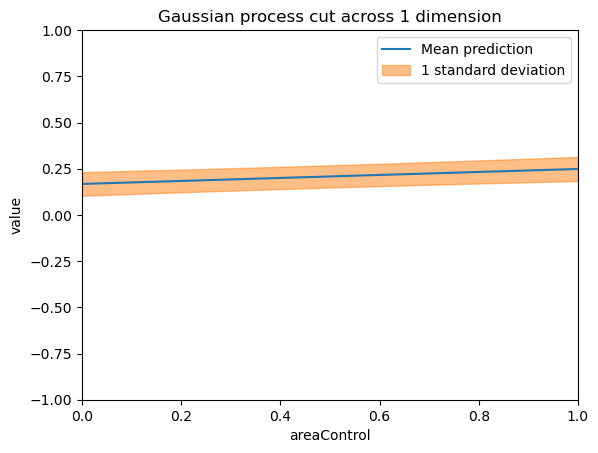

In [154]:
plot_across_dimension(state, 0, v_f_rbf_20, (0, 1), 'areaControl')

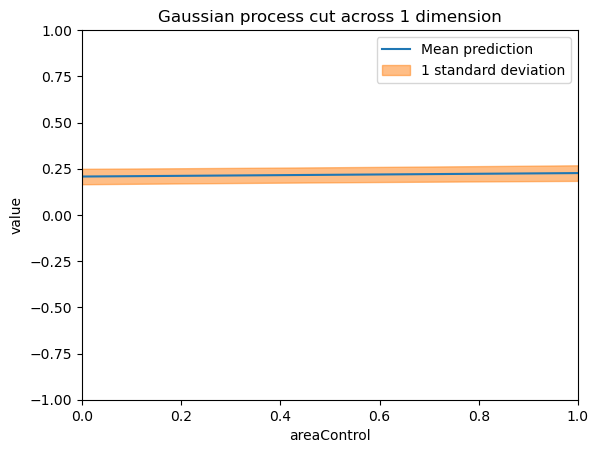

In [155]:
plot_across_dimension(state, 0, v_f_rbf_50, (0, 1), 'areaControl')

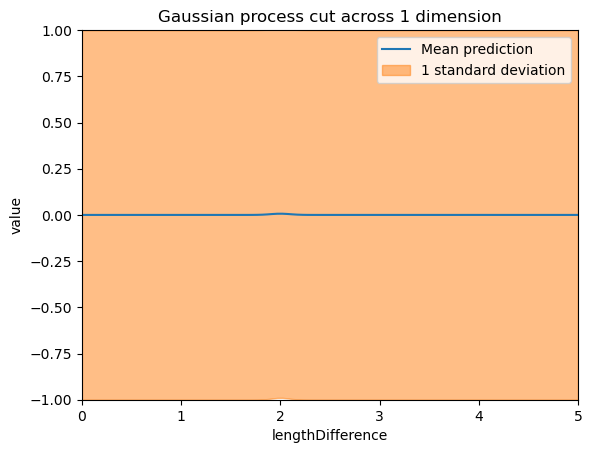

In [156]:
plot_across_dimension(state, 2, v_f_rbf_01, (0, 5), 'lengthDifference')

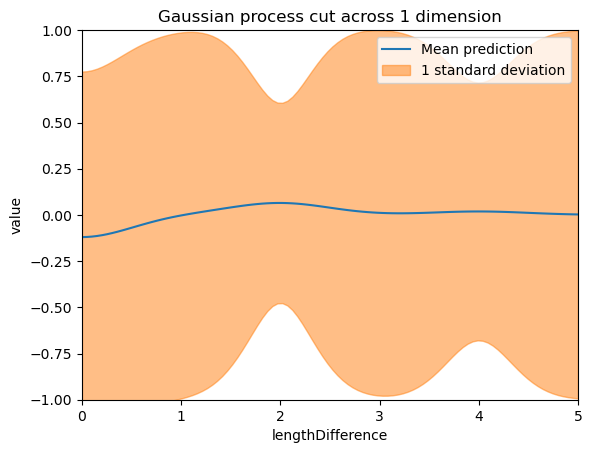

In [157]:
plot_across_dimension(state, 2, v_f_rbf_05, (0, 5), 'lengthDifference')

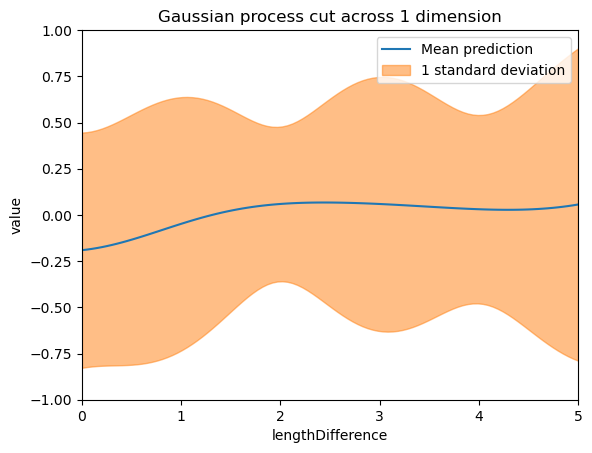

In [158]:
plot_across_dimension(state, 2, v_f_rbf_1, (0, 5), 'lengthDifference')

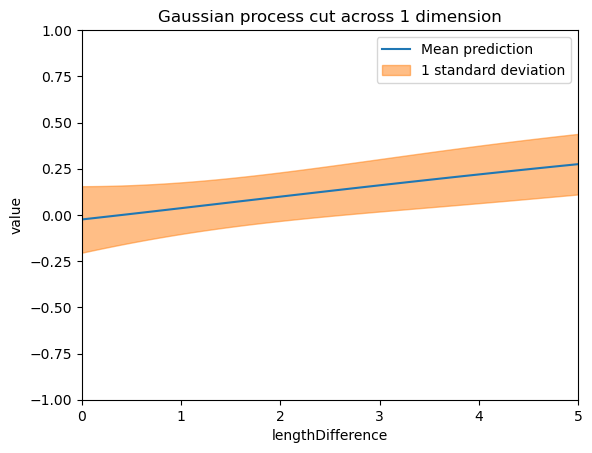

In [159]:
plot_across_dimension(state, 2, v_f_rbf_5, (0, 5), 'lengthDifference')

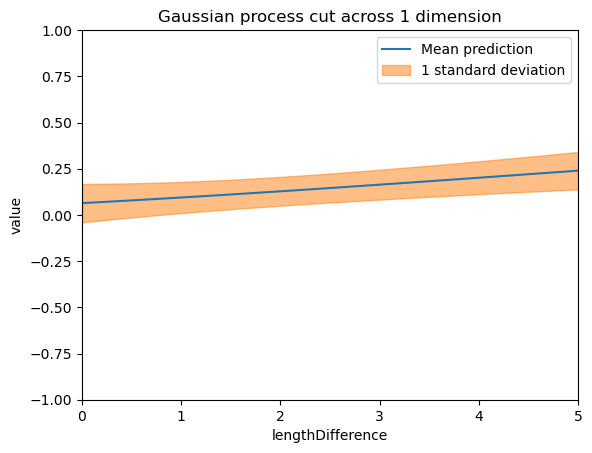

In [160]:
plot_across_dimension(state, 2, v_f_rbf_10, (0, 5), 'lengthDifference')

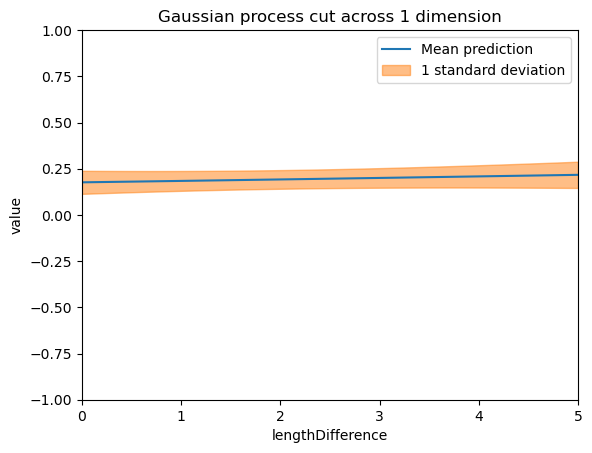

In [161]:
plot_across_dimension(state, 2, v_f_rbf_20, (0, 5), 'lengthDifference')

In [2]:
def confidence_interval(result_array):
    conf = 2*beta.stats(result_array*100, (1-result_array)*100, moments='v')**(1/2)
    # replace nan with 0
    conf[np.isnan(conf)] = 0
    return conf

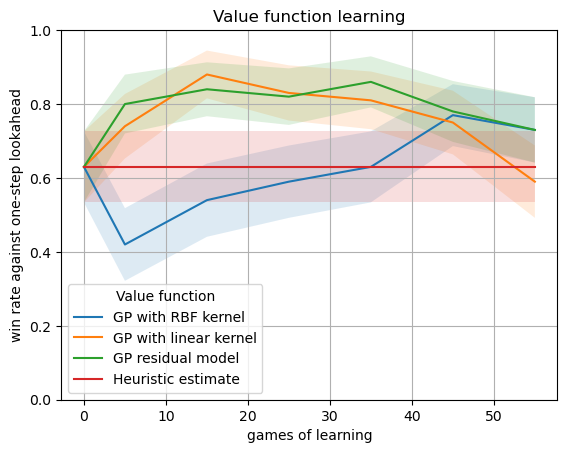

In [17]:
number_of_games = [0, 5, 15, 25, 35, 45, 55]
GP_rbf = np.array([0.63, 0.42, 0.54, 0.59, 0.63, 0.77, 0.73])
GP_linear = np.array([0.63, 0.74, 0.88, 0.83, 0.81, 0.75, 0.59])
GP_residual = np.array([0.63, 0.8, 0.84, 0.82, 0.86, 0.78, 0.73])
Heurustic = np.full(7, 0.63)
# seaborn make a line plot
sns.lineplot(x=number_of_games, y=GP_rbf)
# add linear
sns.lineplot(x=number_of_games, y=GP_linear)
# add residual
sns.lineplot(x=number_of_games, y=GP_residual)
# add heuristic
sns.lineplot(x=number_of_games, y=Heurustic)
# add legend
plt.legend(['GP with RBF kernel', 'GP with linear kernel', 'GP residual model', 'Heuristic estimate'], title='Value function')

plt.xlabel('games of learning')
plt.ylabel('win rate against one-step lookahead')
plt.title('Value function learning')

# show confidence interval
rbf_confidence = confidence_interval(GP_rbf)
linear_confidence = confidence_interval(GP_linear)
heuristic_confidence = confidence_interval(Heurustic)
residual_confidence = confidence_interval(GP_residual)
plt.fill_between(number_of_games, GP_rbf - rbf_confidence, GP_rbf + rbf_confidence, alpha=0.15)
plt.fill_between(number_of_games, GP_linear - linear_confidence, GP_linear + linear_confidence, alpha=0.15)
plt.fill_between(number_of_games, GP_residual - residual_confidence, GP_residual + residual_confidence, alpha=0.15)
plt.fill_between(number_of_games, Heurustic - heuristic_confidence, Heurustic + heuristic_confidence, alpha=0.15)

# make axis from 0 to 1
plt.ylim(0, 1)
# background grid
plt.grid(True)


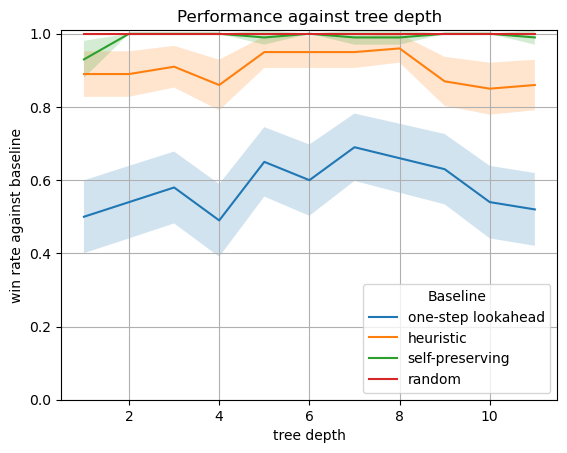

In [30]:
tree_depth = np.array([1,2,3,4,5,6,7,8,9,10,11])
one_step_lookahead = np.array([50,54,58,49,65,60,69,66,63,54,52])
heuristic = np.array([89,89,91,86,95,95,95,96,87,85,86])
self_preserving = np.array([93, 100,100,100,99,100,99,99,100,100,99])
random = np.array([100,100,100,100,100,100,100,100,100,100,100])
# divide by 100 to get win rate
one_step_lookahead = one_step_lookahead/100
heuristic = heuristic/100
self_preserving = self_preserving/100
random = random/100
# seaborn make a line plot
sns.lineplot(x=tree_depth, y=one_step_lookahead)
# add heuristic
sns.lineplot(x=tree_depth, y=heuristic)
# add self preserving
sns.lineplot(x=tree_depth, y=self_preserving)
# add random
sns.lineplot(x=tree_depth, y=random)
# add legend
plt.legend(['one-step lookahead', 'heuristic', 'self-preserving', 'random'], title='Baseline', loc='lower right')
plt.title('Performance against tree depth')
plt.xlabel('tree depth')
plt.ylabel('win rate against baseline')

# show confidence interval
one_step_lookahead_confidence = confidence_interval(one_step_lookahead)
heuristic_confidence = confidence_interval(heuristic)
self_preserving_confidence = confidence_interval(self_preserving)
random_confidence = confidence_interval(random)
plt.fill_between(tree_depth, one_step_lookahead - one_step_lookahead_confidence, one_step_lookahead + one_step_lookahead_confidence, alpha=0.2)
plt.fill_between(tree_depth, heuristic - heuristic_confidence, heuristic + heuristic_confidence, alpha=0.2)
plt.fill_between(tree_depth, self_preserving - self_preserving_confidence, self_preserving + self_preserving_confidence, alpha=0.2)
plt.fill_between(tree_depth, random - random_confidence, random + random_confidence, alpha=0.2)
plt.ylim(0,1.01)
# background grid
plt.grid(True)



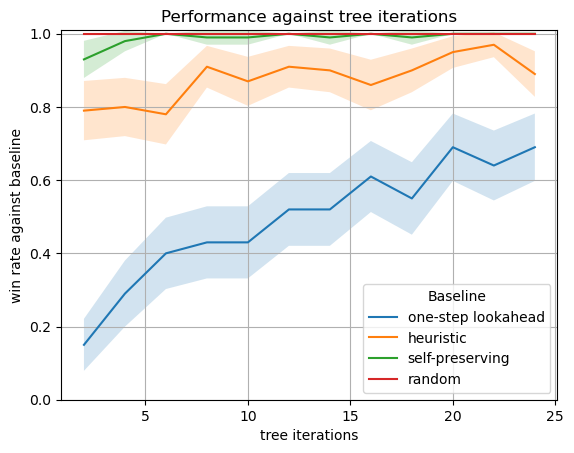

In [26]:
tree_depth = np.array([2,4,6,8,10,12,14,16,18,20,22,24])
one_step_lookahead = np.array([15,29,40,43,43,52,52,61,55,69,64,69])
heuristic = np.array([79,80,78,91,87,91,90,86,90,95,97,89])
self_preserving = np.array([93,98,100,99,99,100, 99, 100,99, 100, 100, 100])
random = np.array([100,100,100,100,100,100,100,100,100,100,100,100])
# divide by 100 to get win rate
one_step_lookahead = one_step_lookahead/100
heuristic = heuristic/100
self_preserving = self_preserving/100
random = random/100
# seaborn make a line plot
sns.lineplot(x=tree_depth, y=one_step_lookahead)
# add heuristic
sns.lineplot(x=tree_depth, y=heuristic)
# add self preserving
sns.lineplot(x=tree_depth, y=self_preserving)
# add random
sns.lineplot(x=tree_depth, y=random)

# add legend
plt.legend(['one-step lookahead', 'heuristic', 'self-preserving', 'random'], title='Baseline')
plt.title('Performance against tree iterations')
plt.xlabel('tree iterations')
plt.ylabel('win rate against baseline')

# show confidence interval
one_step_lookahead_confidence = confidence_interval(one_step_lookahead)
heuristic_confidence = confidence_interval(heuristic)
self_preserving_confidence = confidence_interval(self_preserving)
random_confidence = confidence_interval(random)

plt.fill_between(tree_depth, one_step_lookahead - one_step_lookahead_confidence, one_step_lookahead + one_step_lookahead_confidence, alpha=0.2)
plt.fill_between(tree_depth, heuristic - heuristic_confidence, heuristic + heuristic_confidence, alpha=0.2)
plt.fill_between(tree_depth, self_preserving - self_preserving_confidence, self_preserving + self_preserving_confidence, alpha=0.2)
plt.fill_between(tree_depth, random - random_confidence, random + random_confidence, alpha=0.2)

plt.ylim(0,1.01)
# background grid
plt.grid(True)

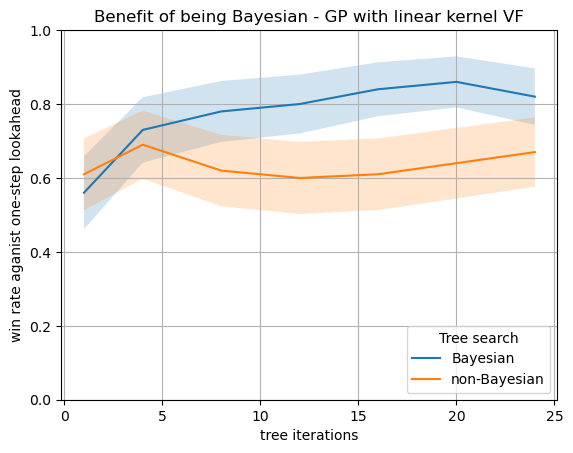

In [31]:
tree_iterations = np.array([1,4,8,12,16,20,24])
bayesian_with_GP = np.array([56,73,78,80,84,86,82])
non_bayesian_with_GP = np.array([61,69,62,60,61,64,67])

# divide by 100 to get win rate
bayesian_with_GP = bayesian_with_GP/100
non_bayesian_with_GP = non_bayesian_with_GP/100
# seaborn make a line plot
sns.lineplot(x=tree_iterations, y=bayesian_with_GP)
# add heuristic
sns.lineplot(x=tree_iterations, y=non_bayesian_with_GP)

# add legend
plt.legend(['Bayesian', 'non-Bayesian'], title='Tree search', loc='lower right')
plt.title('Benefit of being Bayesian - GP with linear kernel VF')
plt.xlabel('tree iterations')
plt.ylabel('win rate aganist one-step lookahead')

# show confidence interval
bayesian_with_GP_confidence = confidence_interval(bayesian_with_GP)
non_bayesian_with_GP_confidence = confidence_interval(non_bayesian_with_GP)

plt.fill_between(tree_iterations, bayesian_with_GP - bayesian_with_GP_confidence, bayesian_with_GP + bayesian_with_GP_confidence, alpha=0.2)
plt.fill_between(tree_iterations, non_bayesian_with_GP - non_bayesian_with_GP_confidence, non_bayesian_with_GP + non_bayesian_with_GP_confidence, alpha=0.2)
plt.ylim(0,1)
# background grid
plt.grid(True)

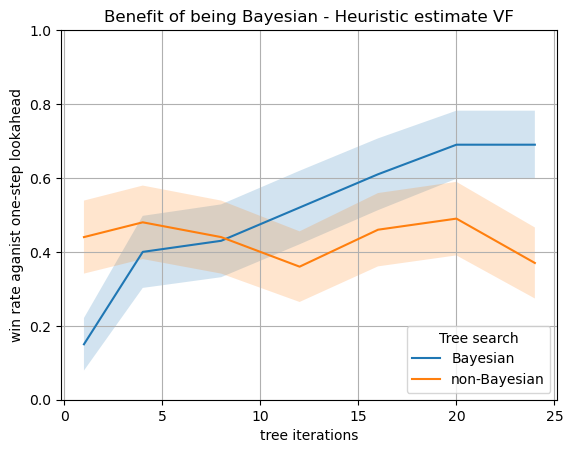

In [32]:
tree_iterations = np.array([1,4,8,12,16,20,24])
bayesian_heuristic = np.array([15,40,43,52,61,69,69])
non_bayesian_heuristic = np.array([44,48,44,36,46,49,37])

# divide by 100 to get win rate
bayesian_heuristic = bayesian_heuristic/100
non_bayesian_heuristic = non_bayesian_heuristic/100
# seaborn make a line plot
sns.lineplot(x=tree_iterations, y=bayesian_heuristic)
# add heuristic
sns.lineplot(x=tree_iterations, y=non_bayesian_heuristic)

# add legend
plt.legend(['Bayesian', 'non-Bayesian'], title='Tree search', loc='lower right')
plt.title('Benefit of being Bayesian - Heuristic estimate VF')
plt.xlabel('tree iterations')
plt.ylabel('win rate aganist one-step lookahead')

# show confidence interval
bayesian_heuristic_confidence = confidence_interval(bayesian_heuristic)
non_bayesian_heuristic_confidence = confidence_interval(non_bayesian_heuristic)

plt.fill_between(tree_iterations, bayesian_heuristic - bayesian_heuristic_confidence, bayesian_heuristic + bayesian_heuristic_confidence, alpha=0.2)
plt.fill_between(tree_iterations, non_bayesian_heuristic - non_bayesian_heuristic_confidence, non_bayesian_heuristic + non_bayesian_heuristic_confidence, alpha=0.2)
plt.ylim(0,1)

# background grid
plt.grid(True)

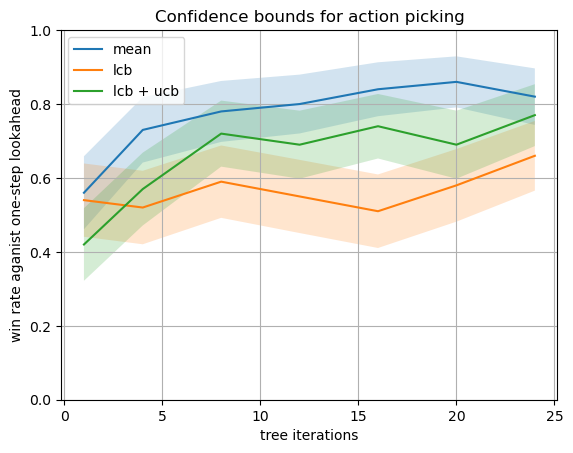

In [24]:
tree_iterations = np.array([1,4,8,12,16,20,24])
mean = np.array([56,73,78,80,84,86,82])
lcb = np.array([54, 52, 59, 55, 51, 58, 66])
lcb_ucb = np.array([42, 57, 72, 69, 74, 69, 77])

# divide by 100 to get win rate
mean = mean/100
lcb = lcb/100
lcb_ucb = lcb_ucb/100
# seaborn make a line plot
sns.lineplot(x=tree_iterations, y=mean)
sns.lineplot(x=tree_iterations, y=lcb)
sns.lineplot(x=tree_iterations, y=lcb_ucb)

# add legend
plt.legend(['mean', 'lcb', 'lcb + ucb'])
plt.title('Confidence bounds for action picking')
plt.xlabel('tree iterations')
plt.ylabel('win rate aganist one-step lookahead')

# show confidence interval
mean_confidence = confidence_interval(mean)
lcb_confidence = confidence_interval(lcb)
lcb_ucb_confidence = confidence_interval(lcb_ucb)

plt.fill_between(tree_iterations, mean - mean_confidence, mean + mean_confidence, alpha=0.2)
plt.fill_between(tree_iterations, lcb - lcb_confidence, lcb + lcb_confidence, alpha=0.2)
plt.fill_between(tree_iterations, lcb_ucb - lcb_ucb_confidence, lcb_ucb + lcb_ucb_confidence, alpha=0.2)
plt.ylim(0,1)

# background grid
plt.grid(True)

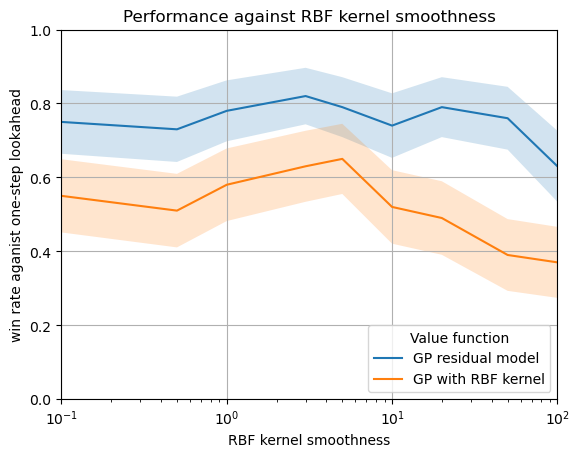

In [29]:
# 35 games of learning
kernel_smoothness = np.array([0.1, 0.5, 1, 3, 5, 10, 20, 50, 100])
gp_resudial_model = np.array([75,73,78,82,79,74,79,76,63])
gp_rbf_model = np.array([55,51,58,63,65,52,49,39,37])

# divide by 100 to get win rate
gp_resudial_model = gp_resudial_model/100
gp_rbf_model = gp_rbf_model/100


# seaborn make a line plot
sns.lineplot(x=kernel_smoothness, y=gp_resudial_model)
sns.lineplot(x=kernel_smoothness, y=gp_rbf_model)

# add legend
plt.legend(['GP residual model', 'GP with RBF kernel'], title='Value function', loc='lower right')
plt.title('Performance against RBF kernel smoothness')
plt.xlabel('RBF kernel smoothness')
plt.ylabel('win rate aganist one-step lookahead')

# show confidence interval
gp_resudial_model_confidence = confidence_interval(gp_resudial_model)
gp_linear_model_confidence = confidence_interval(gp_rbf_model)

plt.fill_between(kernel_smoothness, gp_resudial_model - gp_resudial_model_confidence, gp_resudial_model + gp_resudial_model_confidence, alpha=0.2)
plt.fill_between(kernel_smoothness, gp_rbf_model - gp_linear_model_confidence, gp_rbf_model + gp_linear_model_confidence, alpha=0.2)
plt.ylim(0,1)
plt.xlim(0.1,100)
plt.xscale('log')
# background grid
plt.grid(True)

In [88]:
# get mean evaluation time
# load evaluation_time.txt
with open('../../evaluation_time.txt', 'r') as f:
    evaluation_time = f.read().splitlines()
evaluation_time = np.array(evaluation_time).astype(float)
eval_times.append(evaluation_time.mean())

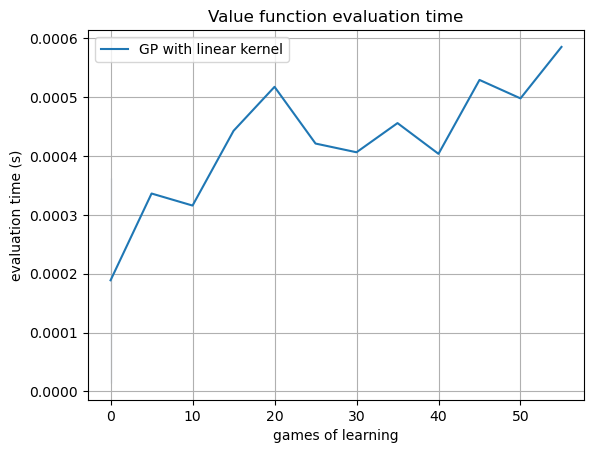

In [97]:
evaluation_time = np.array([1.452993154081254e-05, 0.00036321508832373473, 0.0003362884690611757, 0.00031583741195418633,0.0004427729113902968, 0.0005175400470238897,0.0004211752705930589, 0.00040635925490160966,0.0004559194793758715, 0.0004036670822992362,0.000529241248867444, 0.0004978923188975122,  0.0005853229534100739])
# games of learning
games_of_learning = np.array([0,0,1,2,3,4,5,6,7,8,9,10,11])*5

# plot
sns.lineplot(x=games_of_learning, y=evaluation_time)
# legend
plt.legend(['GP with linear kernel'])
plt.title('Value function evaluation time')
plt.xlabel('games of learning')
plt.ylabel('evaluation time (s)')
plt.grid(True)


In [5]:
confidence_interval(np.array([0.88]))/2

array([0.03233488])